In [ ]:
#imports here
import numpy as np
import matplotlib.pylab as plt

In [ ]:
np.random.rand()

0.7716081740621488

Ellipsis

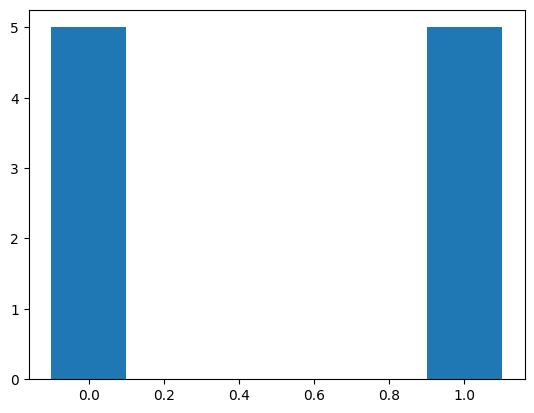

In [ ]:
# get 10 coin tosses with the numpy.random.rand function, make a histogram
np.random.seed(302)
cointainer = []
N = 10
for i in range(N):
  cointainer.append(np.round(np.random.rand()))
cointainer
plt.hist(cointainer, bins=[-0.1,0.1,0.9,1.1])
...

P(H) = 0.5


P(HH) =

P(HHT) =

P(2H & 1T) =  

$P(N_H; N_T) = P(H)^{N_H} * P(T)^{N_T} * {N_H + N_T \choose  N_H} $

In [ ]:
from math import comb
P_2H_8T = ...
print(f"the probability of 2H and 8T is {P_2H_8T}")

the probability of 2H and 8T is 0.0439453125


# Fair coin

The binomial distribution is the distribution that described the probability of getting outcome X $N$ times out of $M$ trials for a 2-outcome experiments with each trial with the same probability P(X).

Now show binomial distribution for 30 coin tosses of a _fair_ coin.

In [ ]:
import scipy as sp

In [ ]:
sp.stats.binom?

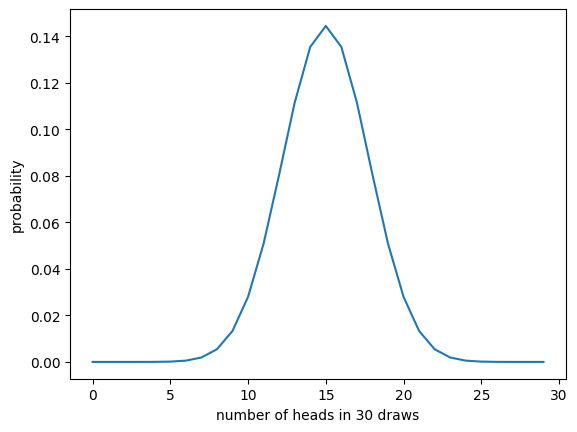

In [ ]:
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# vegas coin
lets weight the coin toward tail (by 30%) and show the binomial distribution of probabilities

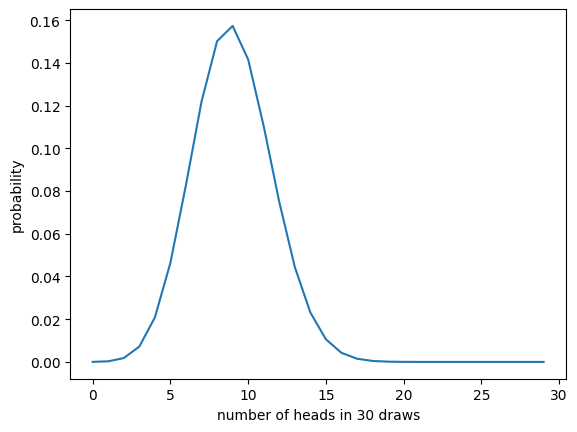

In [ ]:
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.3));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

Now get 10 draws from the same probability distributin, plot the histogram of outcomes, and compare it to the _theoretical_ binomial probability distributions

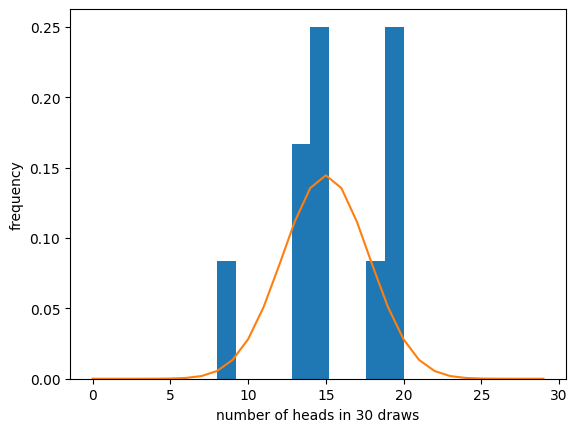

In [ ]:
draws = sp.stats.binom.rvs(30, 0.5, size=10)
plt.hist(draws, density=True)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

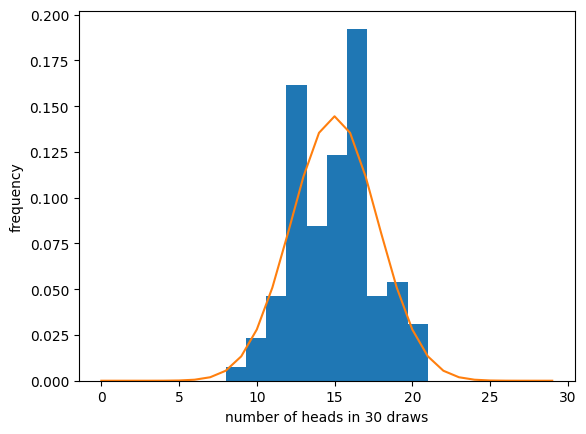

In [ ]:
#Do it for a sample of 100
draws = sp.stats.binom.rvs(30, 0.5, size=100)
plt.hist(draws, density=True)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

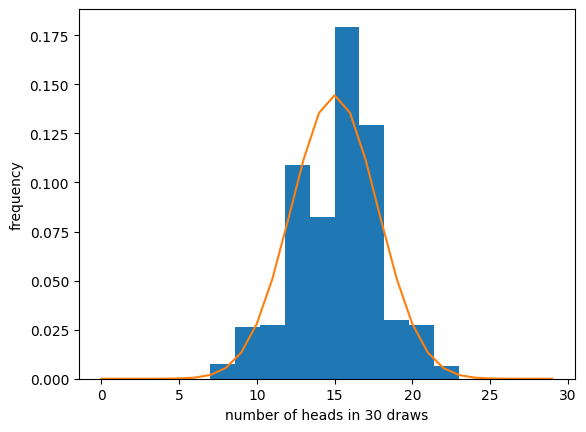

In [ ]:
#Do it for a sample of 1000
draws = sp.stats.binom.rvs(30, 0.5, size=1000)
plt.hist(draws, density=True)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

now do it for the vegas coin we used before

In [ ]:
#vegas coin
#Do it for a sample of 1000

...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

In [ ]:
# we can also do it the hacky way if we dont know or want to use a package with a fundtion that is under the hood and we dont see
cointoss = np.zeros(10_000)
for i in range(10_000):
  cointoss[i] = np.round(np.random.rand(30)).sum()

plt.hist(cointoss, bins=np.arange(-0.5,30), density=True);
#cointoss
plt.ylabel("frequency")
plt.xlabel("number of heads in 30 draws");


In [ ]:
print(plt.hist(cointoss, bins=np.arange(-0.5,30), density=True)[0].sum())
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));

plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# BAYESIAN PROBABILITY
add a prior : you are in vegas and you are sure you are going to get tricked - assume your coin has 0 probability to get heads

In [ ]:
x = np.linspace(0.,1,100)
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

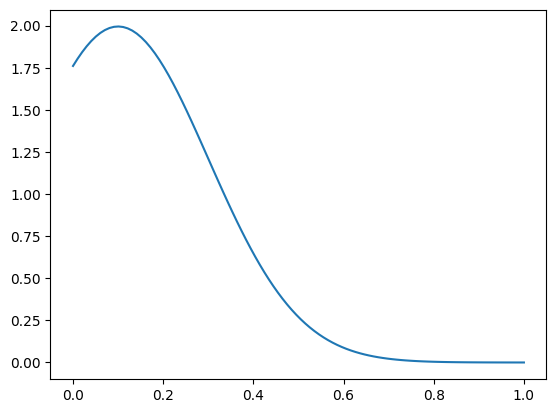

In [ ]:
#prior = np.zeros_like(x)
#prior[:50] = 1
prior = sp.stats.norm.pdf(x, 0.1, 0.2)
plt.plot(x, prior)

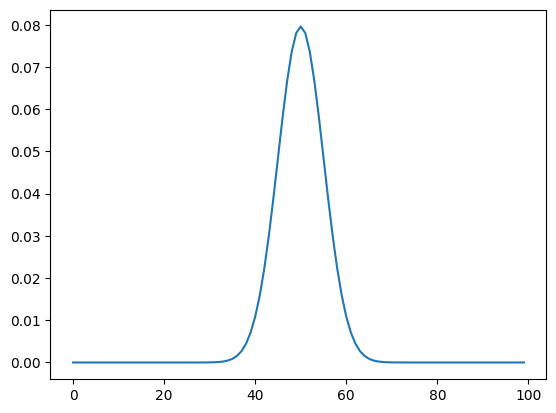

In [ ]:
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(likelihood)

Text(0.5, 0, 'probability of H')

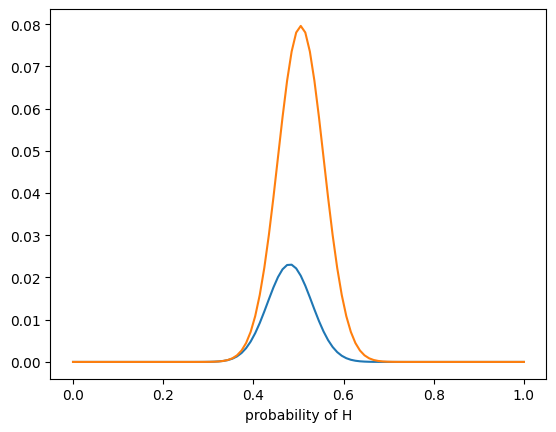

In [ ]:
#0 probability of getting heads=1, 100% probability of getting tails...
plt.plot(x, likelihood * prior)
plt.plot(x, likelihood)
#plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
#plt.yticks([0, 1], ["head", "tail"]);

In [ ]:
#BAYES THEOREM:
#Posterior = likelihood * prior / evidence ~ likelihood * priori
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
posterior = ...
plt.plot(x, posterior, label="unnormalized probability")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
#try a continuous, never 0 prior
prior = ...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);


In [ ]:
posterior = ...
plt.plot(x, posterior, label="unnormalized posterior unfair coin")
plt.plot(x, sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5) / 3.45, label="fair coin")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);